# Working with Time Series Data

# I. Temperatures

## Getting to know the data

In [1]:
# General imports for these exercises

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vega_datasets import data

In [2]:
# Displaying the temperatures data

data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [3]:
# Reassigning the df to a variable

temps = data.sf_temps()
temps.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [4]:
# Getting general info about the df

temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
# Checking to make sure there are no nulls

temps.isnull().sum()

temp    0
date    0
dtype: int64

In [6]:
# Reasssigning the date column as index

temps = temps.set_index('date')
temps.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


## *1. Resample by the day and take the average temperature. Visualize the average temperature over time*

In [8]:
# Setting day as the unit for resampling

pd.Timedelta('1d')

Timedelta('1 days 00:00:00')

In [9]:
# Resampling by the day

temps.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:title={'center':'Average Daily Temperature'}, xlabel='date'>

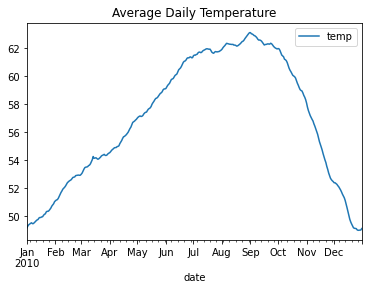

In [10]:
# Plotting the curve of the average daily temp

temps.resample('D').mean().plot(title='Average Daily Temperature')

## *2. Write the code necessary to visualize the minimum temperature over time*

<AxesSubplot:title={'center':'Minimum Daily Temperature'}, xlabel='date'>

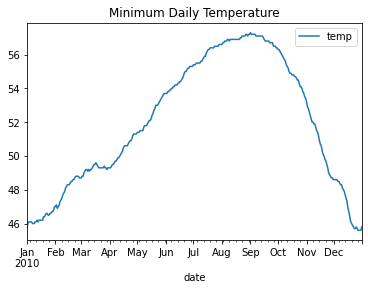

In [11]:
# Plotting the curve of the average daily temp

temps.resample('D').min().plot(title='Minimum Daily Temperature')

## *3. Write the code necessary to visualize the maximum temperature over time*

<AxesSubplot:title={'center':'Maximum Daily Temperature'}, xlabel='date'>

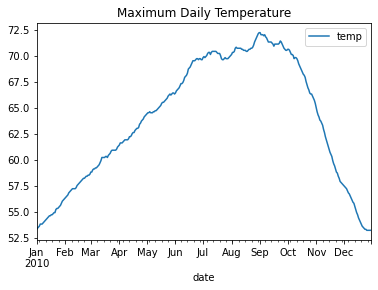

In [12]:
temps.resample('D').max().plot(title='Maximum Daily Temperature')

## *4. Which month is the coldest, on average?*

In [13]:
# Creating a column to hold the months

temps['month'] = temps.index.strftime('%b')

In [22]:
# Displaying the coldest average monthly temp

temps.groupby('month').temp.mean().sort_values().head(1)

# January is the coldest in average

month
Jan    49.98414
Name: temp, dtype: float64

## *5. Which month has the highest average temperature?*

In [15]:
# Displaying the nottest average monthly temp

temps.groupby('month').temp.mean().sort_values(ascending=False)

# September is the hottest in average

month
Sep    62.487083
Aug    62.405376
Jul    61.765457
Jun    60.444722
Oct    60.253091
May    57.970968
Apr    55.633056
Nov    55.185139
Mar    53.956528
Feb    52.243899
Dec    50.498253
Jan    49.984140
Name: temp, dtype: float64

## *6.*

>### a. Resample by the day and calculate the min and max temp for the day

>I noticed that resampling removes the previous column so i'll use a different df for this exercise

In [17]:
# Creating a new df with the min and max columns

temps1 = temps.resample('D').temp.agg(['min', 'max'])
temps1.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


>### b. Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [19]:
# Creating a column to assign to the temp changes

temps1['temp_change'] = temps1['max'] - temps1['min']

In [23]:
temps1.head()

,min,max,temp_change
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [27]:
# Creating a month column then getting the max temp change

temps1['month'] = temps1.index.strftime('%b')
temps1.groupby('month').temp_change.max().sort_values().tail(1)

# August has the most temp changes

month
Aug    15.0
Name: temp_change, dtype: float64

## *Bonus question

>### Visualize the daily min, average, and max temperature over time on a single line plot

<AxesSubplot:xlabel='date'>

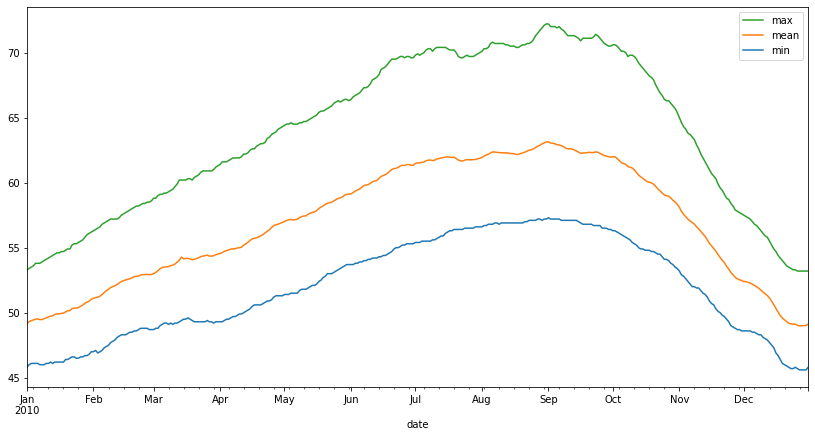

In [52]:
# NB. be careful of multi indexes and aggregating series vs dataframes
# ax = df.plot(alpha=.4, figsize=(14, 7), lw=.2)
temps.resample('D').temp.agg(['min', 'mean', 'max']).plot(figsize=(14, 7), legend='reverse')

# II. Seattle Weather

## Getting to know the data

In [37]:
# Displaying the weather data

data.seattle_weather()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [38]:
# Reassigning the df to a variable

seattle_weather = data.seattle_weather()
seattle_weather.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [39]:
# Getting general info

seattle_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [41]:
# Making sure there are no nulls

seattle_weather.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

## *1. Which year and month combination has the highest amount of precipitation?*

In [43]:
# Setting date as the index

seattle_weather = seattle_weather.set_index('date')

In [44]:
# Reformatting the months and creating the month column

seattle_weather['month'] =seattle_weather.index.strftime('%b')

In [45]:
# Creating a year column

seattle_weather['year'] = seattle_weather.index.year

In [46]:
# Displaying the df

seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather,month,year
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,Jan,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,Jan,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,Jan,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,Jan,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,Jan,2012


In [48]:
# Checking the number of months effectively recorded

seattle_weather.month.nunique()

12

In [47]:
# Checking the number of years

seattle_weather.year.nunique()

4

In [54]:
# Resampling, summing, and reordering

seattle_weather.resample('M').precipitation.sum().sort_values().tail(1)

# December 2015 has the most precipitation

date
2015-12-31    284.5
Name: precipitation, dtype: float64

In [67]:
seattle_weather.resample('M').precipitation.sum().nlargest

<bound method Series.nlargest of date
2012-01-31    173.3
2012-02-29     92.3
2012-03-31    183.0
2012-04-30     68.1
2012-05-31     52.2
2012-06-30     75.1
2012-07-31     26.3
2012-08-31      0.0
2012-09-30      0.9
2012-10-31    170.3
2012-11-30    210.5
2012-12-31    174.0
2013-01-31    105.7
2013-02-28     40.3
2013-03-31     69.7
2013-04-30    149.6
2013-05-31     60.5
2013-06-30     33.1
2013-07-31      0.0
2013-08-31     34.4
2013-09-30    156.8
2013-10-31     39.2
2013-11-30     96.3
2013-12-31     42.4
2014-01-31     94.0
2014-02-28    155.2
2014-03-31    240.0
2014-04-30    106.1
2014-05-31     80.0
2014-06-30     18.8
2014-07-31     19.6
2014-08-31     46.0
2014-09-30     56.7
2014-10-31    171.5
2014-11-30    123.1
2014-12-31    121.8
2015-01-31     93.0
2015-02-28    134.2
2015-03-31    113.5
2015-04-30     51.6
2015-05-31     14.8
2015-06-30      5.9
2015-07-31      2.3
2015-08-31     83.3
2015-09-30     21.1
2015-10-31    122.4
2015-11-30    212.6
2015-12-31    284.5
Fr

## *2. Visualize the amount of monthly precipitation over time*

<AxesSubplot:title={'center':'Monthly Precipitation'}, xlabel='date'>

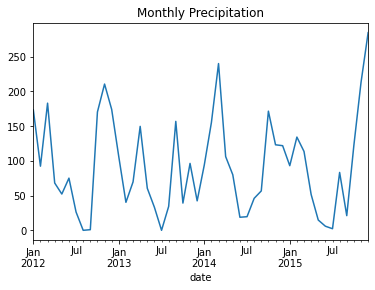

In [59]:
seattle_weather.resample('M').precipitation.sum().plot(title='Monthly Precipitation', )

In [ ]:
sns.lineplot(data=daily, x='date', y='value')

## *3. Visualize the amount of wind over time. Choose a time interval you think is appropriate*

<AxesSubplot:title={'center':'Biweekly Average Wind'}, xlabel='date'>

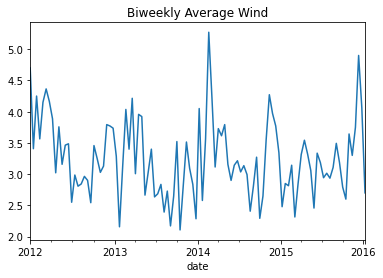

In [64]:
seattle_weather.resample('2w').wind.mean().plot(title='Biweekly Average Wind')